# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 10 - przekształcenia






### Zadanie 1

1) Utwórz macierz (zbiór punktów) reprezentującą figurę geometryczną, składającą się z minimum 4 punktów, której "punkt centralny" (na oko) znajduje się w punkcie `(0, 0)`.

2) Wyświetl utworzoną figurę na wykresie.

> Podpowiedź: możesz użyć funkcji [`plt.fill`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.fill.html)

Kolejne zadania wykonuj używając macierzy utworzonej w tym zadaniu (chyba, że podano inaczej).


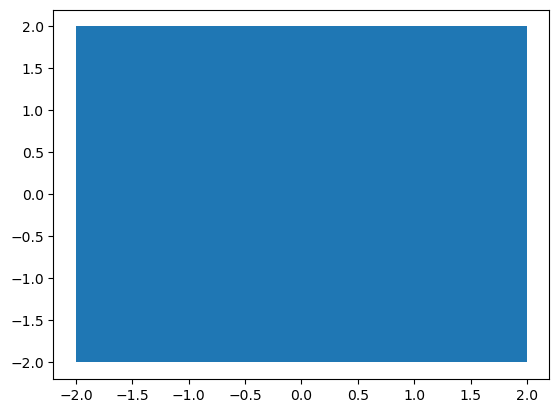

In [47]:
import numpy as np
import matplotlib.pyplot as plt
point1 = [-2, 2]
point2 = [2, 2]
point3 = [2, -2]
point4 = [-2, -2]
figure_matrix = np.array([point1, point2, point3, point4]).T
plt.fill(figure_matrix[0], figure_matrix[1])
plt.show()


### Zadanie 2

Aby wykonać przekształcenie należy pomnożyć macierz przekształcaną przez _mecierz przekształcenia_. Poniżej wymienione są przykładowe macierze przekształceń pozwalające wykonać tranformacje:

Obrót o kąt $\theta$:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta\\
\text{sin}\theta & \text{cos}\theta
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0x$:

$$
A_k = \begin{pmatrix}
k & 0\\
0 & 1
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
1 & 0\\
0 & k
\end{pmatrix}
$$

Rozciągnięcie w proporcji $k_x$ wzdłuż osi $0x$ i w proporcji $k_y$ wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
k_x & 0\\
0 & k_y
\end{pmatrix}
$$

Pochylenie względem osi $0y$:

$$
A_k = \begin{pmatrix}
1 & k\\
0 & 1
\end{pmatrix}
$$

Pochylenie względem osi $0x$:

$$
A_k = \begin{pmatrix}
1 & 0\\
k & 1
\end{pmatrix}
$$



**Polecenie**

Utwórz trzy animacje dla obrotu, rozciągnięcia i pochylenia (odpowiednio).

MovieWriter imagemagick unavailable; using Pillow instead.


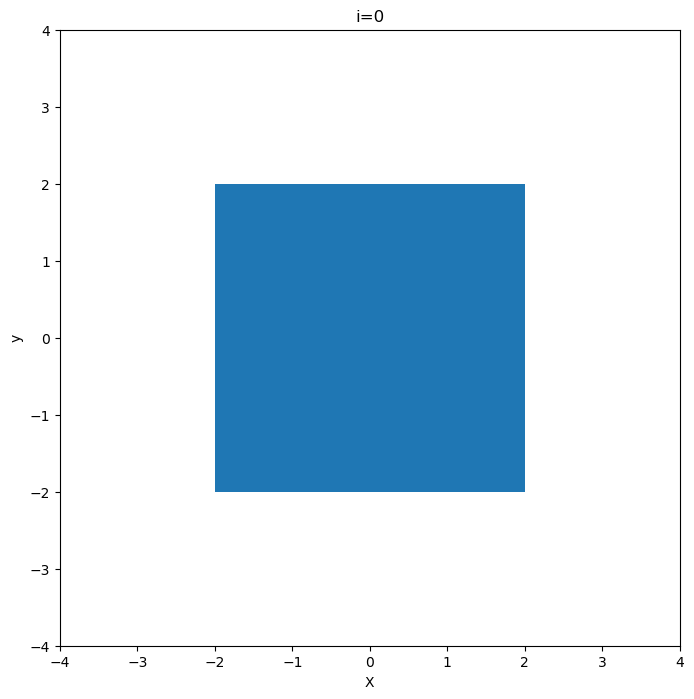

In [50]:
import math
import matplotlib.animation

fig, ax = plt.subplots(figsize=(8,8))


def animate_alfa(i):
    radians = math.radians(i)
    Aalfa = np.array([[np.cos(radians), np.sin(radians)], [-np.sin(radians), np.cos(radians)]])
    figure_matrix_2 = Aalfa @ figure_matrix
    ax.clear()
    ax.set_title(f'{i=}')
    ax.set_xlim((-4, 4))
    ax.set_ylim(-4, 4)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.fill(figure_matrix_2[0], figure_matrix_2[1])

ani = matplotlib.animation.FuncAnimation(fig, animate_alfa, frames=90, interval=100, repeat=False) 
ani.save('obrot.gif', writer='imagemagick', fps=100)

MovieWriter imagemagick unavailable; using Pillow instead.


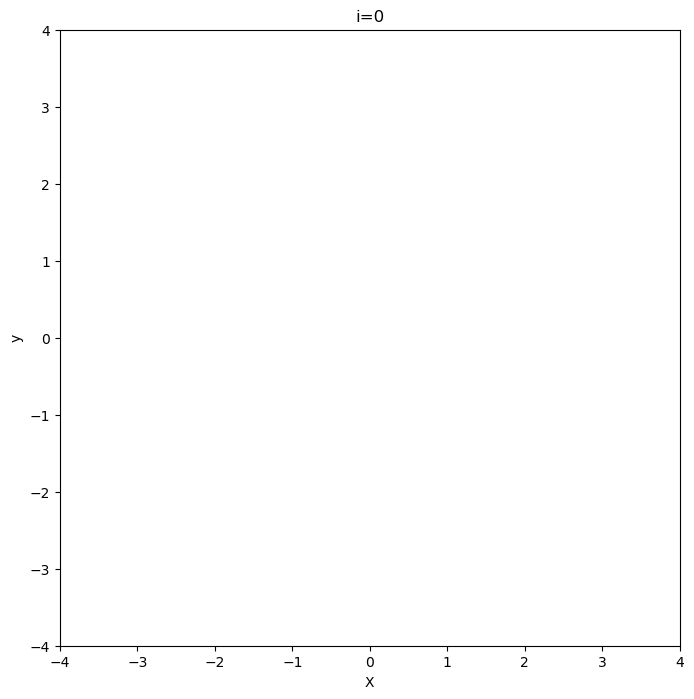

In [49]:
fig, ax = plt.subplots(figsize=(8,8))


def animate_skal(i):
    k = i/100
    Arozx = np.array([[k, 0], [0, 1]])
    figure_matrix_2 = Arozx @ figure_matrix
    ax.clear()
    ax.set_title(f'{i=}')
    ax.set_xlim((-4, 4))
    ax.set_ylim(-4, 4)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.fill(figure_matrix_2[0], figure_matrix_2[1])

ani = matplotlib.animation.FuncAnimation(fig, animate_skal, frames=100, interval=100, repeat=False) 
ani.save('skalowanie.gif', writer='imagemagick', fps=100)

MovieWriter imagemagick unavailable; using Pillow instead.


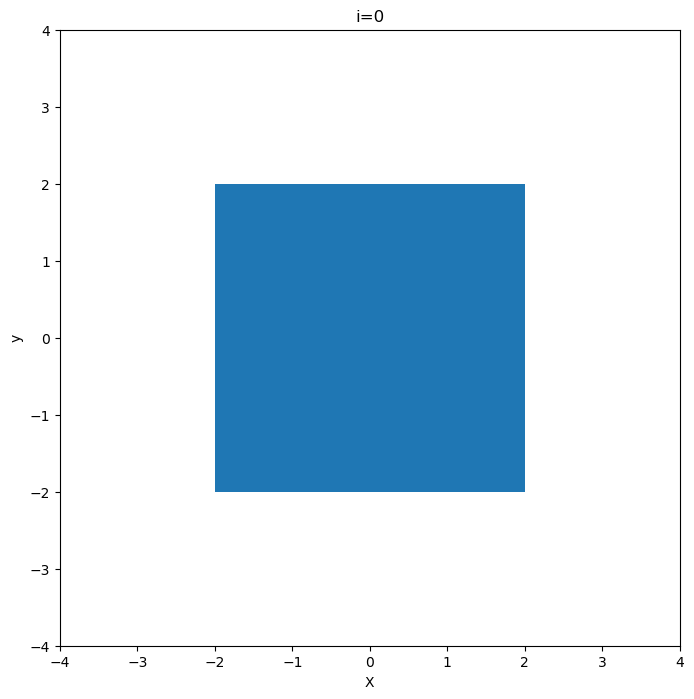

In [71]:
fig, ax = plt.subplots(figsize=(8,8))


def animate_pochy(i):
    k = i/100
    Apochy = np.array([[1, 0], [k, 1]])
    figure_matrix_2 = Apochy @ figure_matrix
    ax.clear()
    ax.set_title(f'{i=}')
    ax.set_xlim((-4, 4))
    ax.set_ylim(-4, 4)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.fill(figure_matrix_2[0], figure_matrix_2[1])

ani = matplotlib.animation.FuncAnimation(fig, animate_pochy, frames=100, interval=100, repeat=False) 
ani.save('pochylenie.gif', writer='imagemagick', fps=100)

### Zadanie 3 (przekształcenia afiniczne)

Przekształcenia afiniczne pozwalają na wykonywanie operacji _translacji_ i łączenia jej z innymi operacjami przekształcenia. 
Aby wykonać przekształcenie afiniczne należy zmienić reprezentację punktu $(x, y) \in R^2$ na $(x, y, 1) \in R^3$. W ten sposób macierz przekształceń osiąga wymiar 3x3. Macierz pozwalająca wykonanie operacji translacji (przesunięcie o wektor $[k_x, k_y]$) wygląda wtedy następująco:

$$
A_k = \begin{pmatrix}
1 & 0 & k_x \\
0 & 1 & k_y \\
0 & 0 & 1
\end{pmatrix}
$$


Pozostałe operacje analogicznie jak wcześniej, np. operacja obrotu:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Polecenie**

Wykonaj animację, gdzie operacja translacji oraz obrotu są wykonywane za pomocą jednej operacji macierzowej.

> Podpowiedź: należy "połączyć" macierze przekształceń w jedną.


Przykład:

<img src="./Figure_3.gif" height="300" width="300" />

In [194]:
# figure_matrix_3d = np.hstack((figure_matrix, np.ones((figure_matrix.shape[0], 1))))
identity_row = np.array([[1]*len(figure_matrix[0])])
figure_matrix_3d = np.vstack((figure_matrix, identity_row))
figure_matrix_3d

array([[-2,  2,  2, -2],
       [ 2,  2, -2, -2],
       [ 1,  1,  1,  1]])

MovieWriter imagemagick unavailable; using Pillow instead.


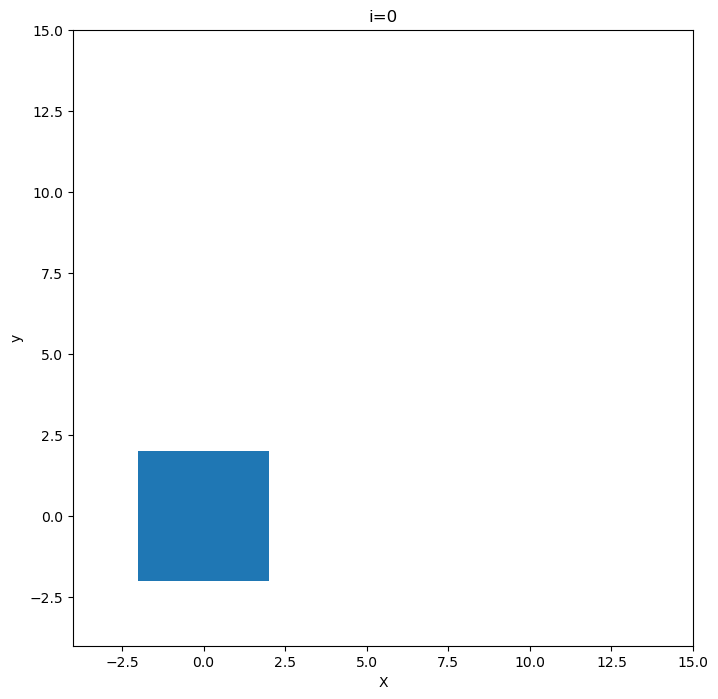

In [191]:
fig, ax = plt.subplots(figsize=(8,8))


def animate_pochy(i):
    radians = math.radians(i)
    kx = i/10
    ky = i/10
    Ak = np.array([[1, 0, 0], [0, 1, 0], [kx, ky, 1]])
    Ateta = np.array([[np.cos(radians), np.sin(radians), 0], 
                    [-np.sin(radians), np.cos(radians), 0], 
                    [0, 0, 1]])
    figure_matrix_2 = (Ak.T @ Ateta) @ figure_matrix_3d
    ax.clear()
    ax.set_title(f'{i=}')
    ax.set_xlim((-4, 15))
    ax.set_ylim(-4, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.fill(figure_matrix_2[0], figure_matrix_2[1])

ani = matplotlib.animation.FuncAnimation(fig, animate_pochy, frames=90, interval=100, repeat=False) 
ani.save('afiniczne.gif', writer='imagemagick', fps=100)

### Zadanie 4 (przekształcenia macierzowe w 3D)

1) Utwórz prostą figurę geometryczną złożoną z 8 punktów w przestrzeni 3D (podobnie jak w pierwszym zadaniu).

2) Utwórz animację obrotu figury względem osi $0z$.

> Aby wykonać taki obrót należy użyć poniższej macierzy przekształceń:
$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Przykład**


<img src="./Figure_4.gif" height="300" width="300" />

Przykład rysowania w 3D:

```python
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d') # ax = Axes3D(fig) 

m = np.random.rand(8, 3)

ax.scatter(m[:, 0], m[:, 1], m[:, 2], s=500)
plt.show()
```

In [229]:
figure_3d = np.array([
    [0, 0, 0],
    [2, 0, 0],
    [2, 2, 0],
    [0, 2, 0],
    [0, 0, 2],
    [2, 0, 2],
    [2, 2, 2],
    [0, 2, 2]
]).T

MovieWriter imagemagick unavailable; using Pillow instead.


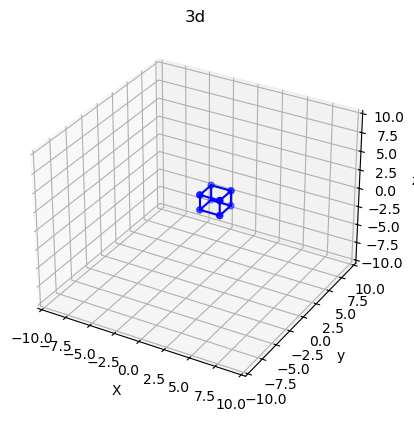

In [234]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

def animate_3d(i):
    radians = math.radians(i*4)
    Ateta = np.array([[np.cos(radians), np.sin(radians), 0], 
                    [-np.sin(radians), np.cos(radians), 0], 
                    [0, 0, 1]])
    figure_matrix_2 = Ateta @ figure_3d
    ax.clear()
    ax.set_title('3d')
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    ax.set_zlim((-10, 10))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(figure_matrix_2[0], figure_matrix_2[1], figure_matrix_2[2], c='b', marker='o')
    for edge in edges:
        point1, point2 = edge
        ax.plot([figure_matrix_2.T[point1, 0], figure_matrix_2.T[point2, 0]],
                [figure_matrix_2.T[point1, 1], figure_matrix_2.T[point2, 1]],
                [figure_matrix_2.T[point1, 2], figure_matrix_2.T[point2, 2]], 'b')

ani = matplotlib.animation.FuncAnimation(fig, animate_3d, frames=90, interval=10, repeat=False) 
ani.save('animacja_3d.gif', writer='imagemagick', fps=144)

### Zadanie 5

Połącz punkty (jeżeli nie zrobiłeś wcześniej) figury z poprzedniego zadania.

**Przykład**


<img src="./Figure_5.gif" height="300" width="300" />